# Cissa gap filling example - optimise number of components to drop vs the Monte-Carlo component method
We can use CiSSA to fill in gaps of a time-series by making an initial guess for missing values, then iterating through CiSSA fitting until we reach a convergence.

We have the option to drop "n" components, but pycissa will optimise the n for you.

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import copy
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('../../..')
home_path = os.path.abspath('')
from pycissa import Cissa

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

In [3]:
data_with_gaps = copy.deepcopy(data)
data_with_gaps['Electric power consumption in Spain'][100] = np.nan
data_with_gaps['Electric power consumption in Spain'][200] = np.nan
data_with_gaps['Electric power consumption in Spain'][300] = np.nan
data_with_gaps['Electric power consumption in Spain'][400] = np.nan
data_with_gaps['Electric power consumption in Spain'][500] = np.nan
print(data_with_gaps['Electric power consumption in Spain'][499:502])

499    21425.56417
500            NaN
501    19817.63946
Name: Electric power consumption in Spain, dtype: float64


In [4]:
#create the cissa object
cissa_object_n_components = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

## First we gap fill by optimising the number of components to drop.

In [5]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_n_components.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.05], #this means we set missing values to the previous good value multiplied by 1.05 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True, #just so we can see what is going on...
                        #
                        component_selection_method ='add_components_iteratively' #this tells pycissa to optimise the number of componets to drop
                       )

Checking for censored or nan data...
Step 0 of 20
   Dropping 29 of 30
iteration 0.  3632.4851669144446  vs target error:  50
iteration 1.  162.3053763378266  vs target error:  50
iteration 2.  12.643081496011291  vs target error:  50
END iteration: 1, error: nan vs target error: 50
   Dropping 28 of 30
iteration 0.  2689.009892074782  vs target error:  50
iteration 1.  246.12668950445004  vs target error:  50
iteration 2.  33.28908930787884  vs target error:  50
END iteration: 1, error: 24925.85424464695 vs target error: 50
   Dropping 27 of 30
iteration 0.  1406.2848206240235  vs target error:  50
iteration 1.  143.04679127361067  vs target error:  50
iteration 2.  16.89154973354175  vs target error:  50
END iteration: 1, error: 24327.423641236448 vs target error: 50
   Dropping 26 of 30
iteration 0.  1326.3388749281057  vs target error:  50
iteration 1.  221.04678040837206  vs target error:  50
iteration 2.  58.45515391586247  vs target error:  50
iteration 3.  14.684936352997283  v

iteration 0.  743.7807752506217  vs target error:  50
iteration 1.  158.28496546590395  vs target error:  50
iteration 2.  37.39272109419471  vs target error:  50
END iteration: 1, error: 23756.547548041046 vs target error: 50
   Dropping 24 of 30
iteration 0.  518.620288921961  vs target error:  50
iteration 1.  189.94180677478212  vs target error:  50
iteration 2.  43.744032610610674  vs target error:  50
END iteration: 1, error: 23954.433818337795 vs target error: 50
   Dropping 23 of 30
iteration 0.  489.1232651362174  vs target error:  50
iteration 1.  113.62817170439294  vs target error:  50
iteration 2.  27.4574272664141  vs target error:  50
END iteration: 1, error: 24518.881113119332 vs target error: 50
   Dropping 22 of 30
iteration 0.  334.71045315451295  vs target error:  50
iteration 1.  88.45937833374904  vs target error:  50
iteration 2.  28.230384386280953  vs target error:  50
END iteration: 1, error: 24094.994614673244 vs target error: 50
   Dropping 21 of 30
iteratio

iteration 0.  1396.094178820381  vs target error:  50
iteration 1.  218.25493811703763  vs target error:  50
iteration 2.  38.8541692308595  vs target error:  50
END iteration: 1, error: 24003.8378746229 vs target error: 50
   Dropping 25 of 30
iteration 0.  643.6514309886951  vs target error:  50
iteration 1.  186.68721428998134  vs target error:  50
iteration 2.  33.10648612463959  vs target error:  50
END iteration: 1, error: 23820.015590620347 vs target error: 50
   Dropping 24 of 30
iteration 0.  709.0495972676645  vs target error:  50
iteration 1.  263.7686541618761  vs target error:  50
iteration 2.  60.72247712166387  vs target error:  50
iteration 3.  13.952617518508902  vs target error:  50
END iteration: 1, error: 24309.24693274339 vs target error: 50
   Dropping 23 of 30
iteration 0.  505.7742508203647  vs target error:  50
iteration 1.  211.3310091504673  vs target error:  50
iteration 2.  55.29990407502578  vs target error:  50
iteration 3.  15.0089368618207  vs target er

iteration 0.  471.3421665528706  vs target error:  50
iteration 1.  92.71973247853069  vs target error:  50
iteration 2.  21.48823931837336  vs target error:  50
END iteration: 1, error: 23867.900483019326 vs target error: 50
   Dropping 23 of 30
iteration 0.  380.963715913293  vs target error:  50
iteration 1.  82.59416272866483  vs target error:  50
iteration 2.  23.58881902345749  vs target error:  50
END iteration: 1, error: 23918.697642575225 vs target error: 50
   Dropping 22 of 30
iteration 0.  243.33602106515474  vs target error:  50
iteration 1.  92.8017318601809  vs target error:  50
iteration 2.  25.03671589072595  vs target error:  50
END iteration: 1, error: 24020.17646485539 vs target error: 50
   Dropping 21 of 30
iteration 0.  405.1230676340416  vs target error:  50
iteration 1.  116.17801918073604  vs target error:  50
iteration 2.  37.043225459332035  vs target error:  50
END iteration: 1, error: 24194.07889402942 vs target error: 50
   Dropping 20 of 30
iteration 0. 

iteration 2.  28.440794847043207  vs target error:  50
END iteration: 1, error: 23317.773467945444 vs target error: 50
   Dropping 25 of 30
iteration 0.  1450.5089142002776  vs target error:  50
iteration 1.  395.6309345203475  vs target error:  50
iteration 2.  81.71169805781602  vs target error:  50
iteration 3.  18.08208196766833  vs target error:  50
END iteration: 1, error: 24045.569359676483 vs target error: 50
   Dropping 24 of 30
iteration 0.  1531.072164223139  vs target error:  50
iteration 1.  306.8425774447891  vs target error:  50
iteration 2.  64.24588443468951  vs target error:  50
iteration 3.  13.487673602839138  vs target error:  50
END iteration: 1, error: 24107.788375946042 vs target error: 50
   Dropping 23 of 30
iteration 0.  954.7153794789874  vs target error:  50
iteration 1.  222.86223977162769  vs target error:  50
iteration 2.  53.29499753249212  vs target error:  50
iteration 3.  12.930348686157942  vs target error:  50
END iteration: 1, error: 23894.3554318

iteration 2.  58.33571151800585  vs target error:  50
iteration 3.  14.719311303846581  vs target error:  50
END iteration: 1, error: 24316.969663732034 vs target error: 50
   Dropping 23 of 30
iteration 0.  414.1924317422622  vs target error:  50
iteration 1.  93.58523766681739  vs target error:  50
iteration 2.  22.716811131855422  vs target error:  50
END iteration: 1, error: 24192.443768139277 vs target error: 50
   Dropping 22 of 30
iteration 0.  387.7684584369283  vs target error:  50
iteration 1.  103.2322310081174  vs target error:  50
iteration 2.  27.480519580111725  vs target error:  50
END iteration: 1, error: 24054.850596971843 vs target error: 50
   Dropping 21 of 30
iteration 0.  208.1497579229478  vs target error:  50
iteration 1.  62.22160291328642  vs target error:  50
iteration 2.  19.635294966900645  vs target error:  50
END iteration: 1, error: 24090.443519447963 vs target error: 50
   Dropping 20 of 30
iteration 0.  215.75178813855462  vs target error:  50
iterati

iteration 0.  186.13098073075  vs target error:  50
iteration 1.  78.2189555529992  vs target error:  50
iteration 2.  30.38719426729149  vs target error:  50
END iteration: 1, error: 24113.19293447157 vs target error: 50
   Dropping 18 of 30
iteration 0.  160.73861027083967  vs target error:  50
iteration 1.  63.566873344465535  vs target error:  50
iteration 2.  25.59572103651837  vs target error:  50
END iteration: 1, error: 24286.59478793798 vs target error: 50
   Dropping 17 of 30
iteration 0.  182.4060984107306  vs target error:  50
iteration 1.  77.88965910930625  vs target error:  50
iteration 2.  35.150461036656935  vs target error:  50
END iteration: 1, error: 24084.262082184086 vs target error: 50
   Dropping 16 of 30
iteration 0.  146.006153856521  vs target error:  50
iteration 1.  69.72733284149383  vs target error:  50
iteration 2.  34.71131274747771  vs target error:  50
END iteration: 1, error: 24333.786251742935 vs target error: 50
   Dropping 15 of 30
iteration 0.  1

iteration 1.  114.93295399338663  vs target error:  50
iteration 2.  51.53866971337406  vs target error:  50
iteration 3.  24.580762755562404  vs target error:  50
END iteration: 1, error: 24257.179884294215 vs target error: 50
   Dropping 16 of 30
iteration 0.  317.19389211089316  vs target error:  50
iteration 1.  158.82486559667856  vs target error:  50
iteration 2.  104.40980593114168  vs target error:  50
iteration 3.  56.20775906558629  vs target error:  50
iteration 4.  30.989286200150843  vs target error:  50
END iteration: 1, error: 24534.61879182833 vs target error: 50
   Dropping 15 of 30
iteration 0.  220.44598374159426  vs target error:  50
iteration 1.  101.04145518059646  vs target error:  50
iteration 2.  80.0132005791339  vs target error:  50
iteration 3.  40.89441599232009  vs target error:  50
END iteration: 1, error: 24763.444361525017 vs target error: 50
   Dropping 14 of 30
iteration 0.  245.35746434385874  vs target error:  50
iteration 1.  155.506393537534  vs t

iteration 0.  239.30020482719706  vs target error:  50
iteration 1.  99.660521731948  vs target error:  50
iteration 2.  42.79132388274641  vs target error:  50
END iteration: 1, error: 24236.127760877756 vs target error: 50
   Dropping 17 of 30
iteration 0.  276.23634690203653  vs target error:  50
iteration 1.  127.38614935892608  vs target error:  50
iteration 2.  66.35838503394154  vs target error:  50
iteration 3.  75.38013407854936  vs target error:  50
iteration 4.  48.44863725939052  vs target error:  50
END iteration: 1, error: 24286.133449839148 vs target error: 50
   Dropping 16 of 30
iteration 0.  249.21818292334981  vs target error:  50
iteration 1.  116.22480134976931  vs target error:  50
iteration 2.  66.63216880542916  vs target error:  50
iteration 3.  42.62922769360142  vs target error:  50
END iteration: 1, error: 24209.018235302607 vs target error: 50
   Dropping 15 of 30
iteration 0.  251.19915389722303  vs target error:  50
iteration 1.  123.68063887809633  vs ta

iteration 1.  80.21933779104441  vs target error:  50
iteration 2.  28.70316321448746  vs target error:  50
END iteration: 1, error: 24007.357341879946 vs target error: 50
   Dropping 19 of 30
iteration 0.  151.54930321460552  vs target error:  50
iteration 1.  48.51571017929723  vs target error:  50
END iteration: 1, error: 24230.886587532743 vs target error: 50
   Dropping 18 of 30
iteration 0.  147.2037192447161  vs target error:  50
iteration 1.  55.0361568137634  vs target error:  50
iteration 2.  22.388324320193533  vs target error:  50
END iteration: 1, error: 24105.63059026201 vs target error: 50
   Dropping 17 of 30
iteration 0.  85.68415177269489  vs target error:  50
iteration 1.  38.13473394420794  vs target error:  50
END iteration: 1, error: 24166.961643787454 vs target error: 50
   Dropping 16 of 30
iteration 0.  83.55240596010705  vs target error:  50
iteration 1.  64.92546688568214  vs target error:  50
iteration 2.  30.349303106976464  vs target error:  50
END iterati

iteration 1.  90.28147634186617  vs target error:  50
iteration 2.  41.02135567210456  vs target error:  50
END iteration: 1, error: 24357.721999044847 vs target error: 50
   Dropping 16 of 30
iteration 0.  173.4512318331504  vs target error:  50
iteration 1.  87.51067263916467  vs target error:  50
iteration 2.  47.80289852142671  vs target error:  50
END iteration: 1, error: 24286.627505600078 vs target error: 50
   Dropping 15 of 30
iteration 0.  179.39266873770407  vs target error:  50
iteration 1.  76.0494177119528  vs target error:  50
iteration 2.  41.802773538676774  vs target error:  50
END iteration: 1, error: 24337.283143776 vs target error: 50
   Dropping 14 of 30
iteration 0.  135.1717837399751  vs target error:  50
iteration 1.  82.80382350413134  vs target error:  50
iteration 2.  53.08059221287422  vs target error:  50
iteration 3.  35.32691016096297  vs target error:  50
END iteration: 1, error: 24201.840391900532 vs target error: 50
   Dropping 13 of 30
iteration 0.  

iteration 0.  145.14174663624706  vs target error:  50
iteration 1.  76.6958681628777  vs target error:  50
iteration 2.  56.64258963180578  vs target error:  50
iteration 3.  38.85609460897143  vs target error:  50
END iteration: 1, error: 24267.84523907178 vs target error: 50
   Dropping 12 of 30
iteration 0.  131.9494111784431  vs target error:  50
iteration 1.  78.19945275365427  vs target error:  50
iteration 2.  46.50672198264505  vs target error:  50
END iteration: 1, error: 24761.124164413457 vs target error: 50
   Dropping 11 of 30
iteration 0.  104.94072302797514  vs target error:  50
iteration 1.  83.71164419435377  vs target error:  50
iteration 2.  69.19824883651086  vs target error:  50
iteration 3.  58.2875373215611  vs target error:  50
iteration 4.  49.588159649428746  vs target error:  50
END iteration: 1, error: 24662.845063037083 vs target error: 50
   Dropping 10 of 30
iteration 0.  101.57993312376942  vs target error:  50
iteration 1.  68.07158088467999  vs target

iteration 0.  132.03331517860826  vs target error:  50
iteration 1.  109.50031273149085  vs target error:  50
iteration 2.  92.39711282096437  vs target error:  50
iteration 3.  78.70594194166449  vs target error:  50
iteration 4.  67.38790191160354  vs target error:  50
iteration 5.  57.858611982484604  vs target error:  50
iteration 6.  49.7534759893083  vs target error:  50
END iteration: 1, error: 24163.399349135016 vs target error: 50
   Dropping 9 of 30
iteration 0.  109.06993674290601  vs target error:  50
iteration 1.  82.02346239750233  vs target error:  50
iteration 2.  58.36092911342138  vs target error:  50
iteration 3.  41.51086306059784  vs target error:  50
END iteration: 1, error: 24296.796321911697 vs target error: 50
   Dropping 8 of 30
iteration 0.  115.0483427918353  vs target error:  50
iteration 1.  101.1910008253833  vs target error:  50
iteration 2.  91.07730875684007  vs target error:  50
iteration 3.  83.04232996138029  vs target error:  50
iteration 4.  76.24

iteration 2.  56.51987389891897  vs target error:  50
iteration 3.  46.613271385787755  vs target error:  50
END iteration: 1, error: 25718.23201699846 vs target error: 50
   Dropping 9 of 30
iteration 0.  95.33568148855753  vs target error:  50
iteration 1.  65.91199502817602  vs target error:  50
iteration 2.  46.61101899389905  vs target error:  50
END iteration: 1, error: 26014.09413481007 vs target error: 50
   Dropping 8 of 30
iteration 0.  73.23266911020818  vs target error:  50
iteration 1.  57.76367459949057  vs target error:  50
iteration 2.  45.50264362557249  vs target error:  50
END iteration: 1, error: 26203.34278562312 vs target error: 50
   Dropping 7 of 30
iteration 0.  88.45208997876959  vs target error:  50
iteration 1.  68.85322262739069  vs target error:  50
iteration 2.  54.68783775614307  vs target error:  50
iteration 3.  62.73421606225952  vs target error:  50
iteration 4.  51.829599254144  vs target error:  50
iteration 5.  42.76903102916992  vs target error: 

iteration 0.  102.06614398150947  vs target error:  50
iteration 1.  71.66878916576937  vs target error:  50
iteration 2.  50.22624543587112  vs target error:  50
iteration 3.  47.50577067162223  vs target error:  50
END iteration: 1, error: 26232.947297060982 vs target error: 50
   Dropping 8 of 30
iteration 0.  95.91770176997915  vs target error:  50
iteration 1.  75.4386494963379  vs target error:  50
iteration 2.  52.62398968535147  vs target error:  50
iteration 3.  36.76421562658878  vs target error:  50
END iteration: 1, error: 26452.851248518833 vs target error: 50
   Dropping 7 of 30
iteration 0.  87.27249814360272  vs target error:  50
iteration 1.  73.64017054554176  vs target error:  50
iteration 2.  62.2409369465509  vs target error:  50
iteration 3.  52.67555044614443  vs target error:  50
iteration 4.  44.62631590311423  vs target error:  50
END iteration: 1, error: 26709.547286975627 vs target error: 50
   Dropping 6 of 30
iteration 0.  80.82614221124196  vs target erro

iteration 2.  43.67746476360247  vs target error:  50
END iteration: 1, error: 25083.502721684614 vs target error: 50
   Dropping 10 of 30
iteration 0.  124.97324661179697  vs target error:  50
iteration 1.  111.06084386209167  vs target error:  50
iteration 2.  98.48273827031645  vs target error:  50
iteration 3.  87.98809921822976  vs target error:  50
iteration 4.  78.87107367655699  vs target error:  50
iteration 5.  70.74180197383868  vs target error:  50
iteration 6.  63.493132501120044  vs target error:  50
iteration 7.  57.02161673037142  vs target error:  50
iteration 8.  51.23511233123827  vs target error:  50
iteration 9.  46.05374750508133  vs target error:  50
END iteration: 1, error: 24140.60066086257 vs target error: 50
   Dropping 9 of 30
iteration 0.  86.13297007891963  vs target error:  50
iteration 1.  60.2132011958853  vs target error:  50
iteration 2.  48.31685091624655  vs target error:  50
END iteration: 1, error: 25679.45145199759 vs target error: 50
   Dropping

iteration 3.  39.178091364865736  vs target error:  50
END iteration: 1, error: 24285.101113406396 vs target error: 50
   Dropping 10 of 30
iteration 0.  92.27485870801492  vs target error:  50
iteration 1.  59.02103839592842  vs target error:  50
iteration 2.  58.51168128395293  vs target error:  50
iteration 3.  37.505623794113475  vs target error:  50
END iteration: 1, error: 24576.369223628655 vs target error: 50
   Dropping 9 of 30
iteration 0.  112.55778816680434  vs target error:  50
iteration 1.  76.12639171178074  vs target error:  50
iteration 2.  57.79896755217078  vs target error:  50
iteration 3.  46.519647902019756  vs target error:  50
END iteration: 1, error: 24923.489626636296 vs target error: 50
   Dropping 8 of 30
iteration 0.  82.94377204230551  vs target error:  50
iteration 1.  59.90471298607275  vs target error:  50
iteration 2.  43.2920607508629  vs target error:  50
END iteration: 1, error: 25069.25304088508 vs target error: 50
   Dropping 7 of 30
iteration 0. 

iteration 0.  95.86976768680728  vs target error:  50
iteration 1.  86.87459067060735  vs target error:  50
iteration 2.  74.835622349608  vs target error:  50
iteration 3.  64.45420774789676  vs target error:  50
iteration 4.  55.30085203535748  vs target error:  50
iteration 5.  47.33108966471252  vs target error:  50
END iteration: 1, error: 27050.077479307063 vs target error: 50
   Dropping 7 of 30
iteration 0.  82.00920103980219  vs target error:  50
iteration 1.  71.74574657405975  vs target error:  50
iteration 2.  57.178098730558304  vs target error:  50
iteration 3.  45.37815069136758  vs target error:  50
END iteration: 1, error: 27201.454201481247 vs target error: 50
   Dropping 6 of 30
iteration 0.  81.16417538303035  vs target error:  50
iteration 1.  71.62735298859937  vs target error:  50
iteration 2.  63.73605764317881  vs target error:  50
iteration 3.  57.158614546856256  vs target error:  50
iteration 4.  51.565094746491354  vs target error:  50
iteration 5.  46.4327

iteration 2.  79.54867227196726  vs target error:  50
iteration 3.  69.74291345313608  vs target error:  50
iteration 4.  61.306989019714194  vs target error:  50
iteration 5.  54.057530899467  vs target error:  50
iteration 6.  47.82095582888661  vs target error:  50
END iteration: 1, error: 25093.440175402076 vs target error: 50
   Dropping 6 of 30
iteration 0.  74.35767865282074  vs target error:  50
iteration 1.  61.24399730910574  vs target error:  50
iteration 2.  50.46115594456819  vs target error:  50
iteration 3.  41.5902377091241  vs target error:  50
END iteration: 1, error: 25370.666150398756 vs target error: 50
   Dropping 5 of 30
iteration 0.  85.84127990548583  vs target error:  50
iteration 1.  74.10337307492128  vs target error:  50
iteration 2.  63.97759780846616  vs target error:  50
iteration 3.  58.38216698265336  vs target error:  50
iteration 4.  53.582338736738194  vs target error:  50
iteration 5.  49.21247976301618  vs target error:  50
END iteration: 1, error

iteration 3.  65.87633919859041  vs target error:  50
iteration 4.  59.768216318807504  vs target error:  50
iteration 5.  54.514563404257615  vs target error:  50
iteration 6.  49.94019585142257  vs target error:  50
END iteration: 1, error: 24271.654609225832 vs target error: 50
   Dropping 7 of 30
iteration 0.  80.23726593431587  vs target error:  50
iteration 1.  56.78706734543243  vs target error:  50
iteration 2.  46.29528409179841  vs target error:  50
END iteration: 1, error: 24325.710727002035 vs target error: 50
   Dropping 6 of 30
iteration 0.  70.91011654941586  vs target error:  50
iteration 1.  56.67886454794784  vs target error:  50
iteration 2.  54.74748352723202  vs target error:  50
iteration 3.  47.43502822688171  vs target error:  50
END iteration: 1, error: 24472.638674354093 vs target error: 50
   Dropping 5 of 30
iteration 0.  60.424881518828045  vs target error:  50
iteration 1.  50.592807221562765  vs target error:  50
iteration 2.  42.500252816792226  vs targe

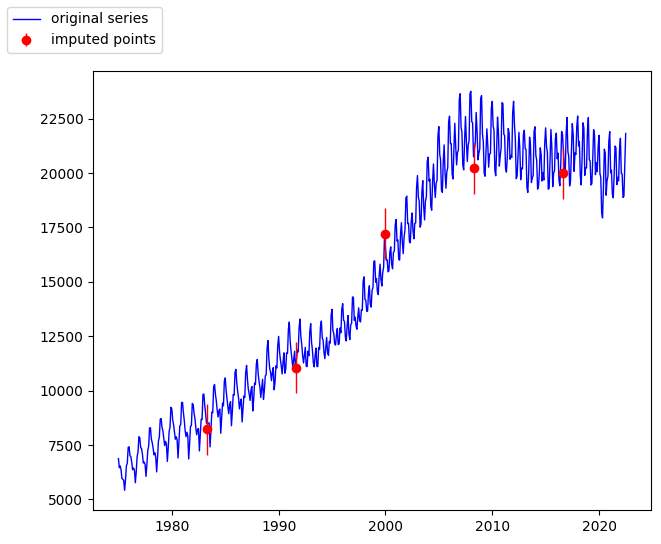

In [6]:
cissa_object_n_components.figures.get('cissa').get('figure_gap_fill')

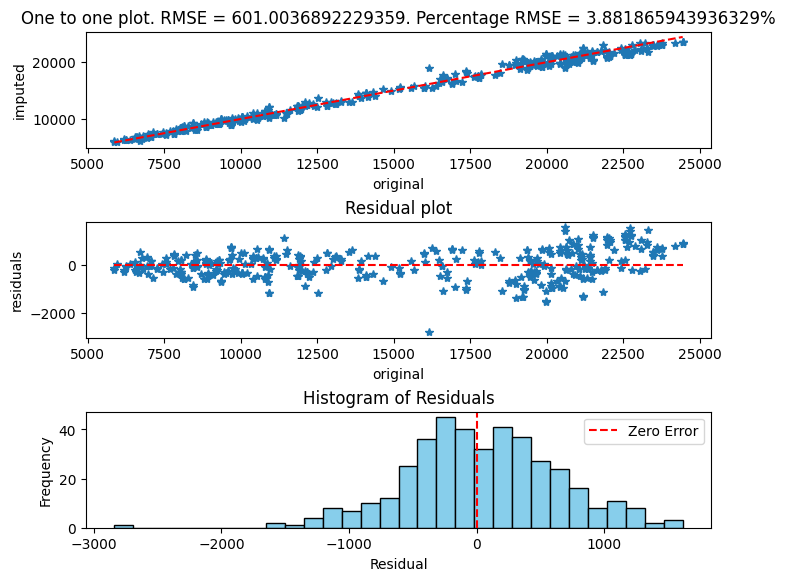

In [7]:
cissa_object_n_components.figures.get('cissa').get('figure_gap_fill_error')

## Now we fill gap using only significant componets found through monte-carlo

In [8]:
cissa_object_monte_carlo = Cissa(t=data_with_gaps['Date'],x=data_with_gaps['Electric power consumption in Spain'])

In [9]:
#here we choose a window length of 5 years. You can try other windown lengths to see how it effects the error rate
#we add some parameters to control the gap filling
cissa_object_monte_carlo.auto_cissa(L = 12*5,
                       K_surrogates = 5, alpha = 0.1,  #settings some parameters for the Monte-Carlo routine
                       test_number = 20, test_repeats=20, #These settings help us to understand the error during gap filling. For 10 repeats we remove 10 known points, gap fill, and calculate the error. On the last run all points are included (none removed) 
                       initial_guess = ['previous', 1.05], #this means we set missing values to the previous good value multiplied by 1.05 
                        max_iter = 500, #ensuring we have enough iterations to converge
                        convergence = ['value', 50], #convergence value is 50 - adjust this for your time series
                        verbose = True, #just so we can see what is going on...
                        #
                        component_selection_method ='monte_carlo_significant_components' #this tells pycissa to use monte-carlo. NOTE this is the default so don't really need to add this...
                       )

Checking for censored or nan data...
Step 0 of 20
iteration 0.  2454.923941922494  vs target error:  50
iteration 1.  405.11002016569546  vs target error:  50
iteration 2.  78.87017496981207  vs target error:  50
iteration 3.  16.4541537097939  vs target error:  50
Step 1 of 20
iteration 0.  2382.6577234088945  vs target error:  50
iteration 1.  313.39065845025107  vs target error:  50
iteration 2.  55.69482308635634  vs target error:  50
iteration 3.  11.85755386963865  vs target error:  50
Step 2 of 20
iteration 0.  2483.5464658998753  vs target error:  50
iteration 1.  287.46312219250103  vs target error:  50
iteration 2.  33.14310399891838  vs target error:  50
Step 3 of 20
iteration 0.  2482.468952800431  vs target error:  50
iteration 1.  329.8835603187399  vs target error:  50
iteration 2.  53.16463598084738  vs target error:  50
iteration 3.  9.76417692601899  vs target error:  50
Step 4 of 20
iteration 0.  8486.845471302335  vs target error:  50
iteration 1.  4355.292166403749

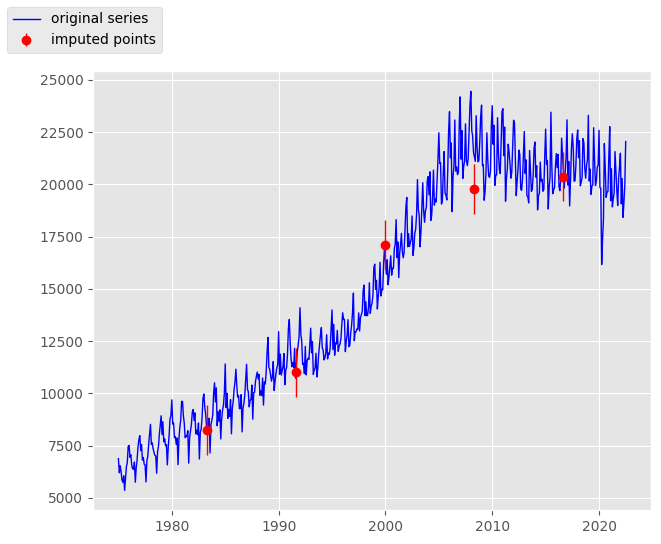

In [10]:
cissa_object_monte_carlo.figures.get('cissa').get('figure_gap_fill')

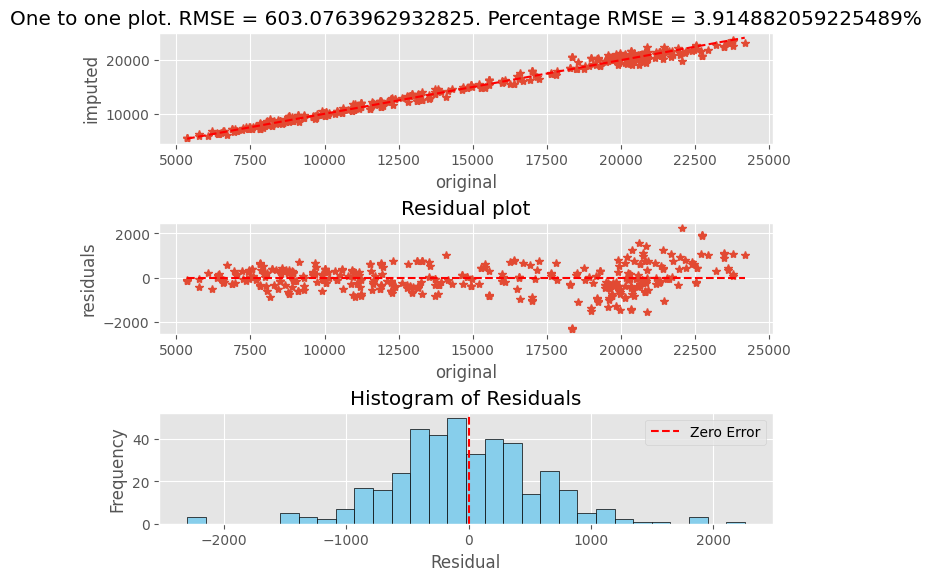

In [11]:
cissa_object_monte_carlo.figures.get('cissa').get('figure_gap_fill_error')

### The RMSE for both methods is similar, but Monte-Carlo is faster.

In [12]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_monte_carlo.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_monte_carlo.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_monte_carlo.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_monte_carlo.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_monte_carlo.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_monte_carlo.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_monte_carlo.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_monte_carlo.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_monte_carlo.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_monte_carlo.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8243.717056369724 percentage error =  5.028489477549792
true:  11537.2 , imputed:  10999.730390874485 percentage error =  4.658579283756158
true:  17861.48079 , imputed:  17104.76176106589 percentage error =  4.236597389829919
true:  20942.10015 , imputed:  19775.020326338657 percentage error =  5.572888178845525
true:  20808.25338 , imputed:  20364.945646668493 percentage error =  2.1304418263072162


In [13]:
print('true: ',data['Electric power consumption in Spain'][100],', imputed: ',cissa_object_n_components.x[100],'percentage error = ', 100*(data['Electric power consumption in Spain'][100] - cissa_object_n_components.x[100])/data['Electric power consumption in Spain'][100])
print('true: ',data['Electric power consumption in Spain'][200],', imputed: ',cissa_object_n_components.x[200],'percentage error = ', 100*(data['Electric power consumption in Spain'][200] - cissa_object_n_components.x[200])/data['Electric power consumption in Spain'][200])
print('true: ',data['Electric power consumption in Spain'][300],', imputed: ',cissa_object_n_components.x[300],'percentage error = ', 100*(data['Electric power consumption in Spain'][300] - cissa_object_n_components.x[300])/data['Electric power consumption in Spain'][300])
print('true: ',data['Electric power consumption in Spain'][400],', imputed: ',cissa_object_n_components.x[400],'percentage error = ', 100*(data['Electric power consumption in Spain'][400] - cissa_object_n_components.x[400])/data['Electric power consumption in Spain'][400])
print('true: ',data['Electric power consumption in Spain'][500],', imputed: ',cissa_object_n_components.x[500],'percentage error = ', 100*(data['Electric power consumption in Spain'][500] - cissa_object_n_components.x[500])/data['Electric power consumption in Spain'][500])

true:  8680.2 , imputed:  8218.794037445337 percentage error =  5.315614416196209
true:  11537.2 , imputed:  11057.184738582713 percentage error =  4.160587156478933
true:  17861.48079 , imputed:  17214.34170556016 percentage error =  3.6230987343566214
true:  20942.10015 , imputed:  20219.482134116766 percentage error =  3.450551810503266
true:  20808.25338 , imputed:  19983.81878082556 percentage error =  3.962055748354395
